In [22]:
# Import statements

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tulips
import mesaPlot as mp
import cmasher as cmr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import Normalize
import os
import mesa_reader as mr

plt.style.use('mesa.mplstyle')

In [14]:
# Make a plot with TULIPS and mesaPlot [this is not actually the model in the slides]

# Set up 
LOGDIR = 'work_minimini3/ALPHA_TEST_LOGS/LOGS_mlt1.5mesh1time1/' 
import mesaPlot as mp

# load the mesaPlot object
m11 = mp.MESA()
m11.log_fold=LOGDIR
m11.loadHistory(filename_in=LOGDIR + 'history.data')

work_minimini3/ALPHA_TEST_LOGS/LOGS_mlt1.5mesh1time1//profile8.data
work_minimini3/ALPHA_TEST_LOGS/LOGS_mlt1.5mesh1time1//profile8.data


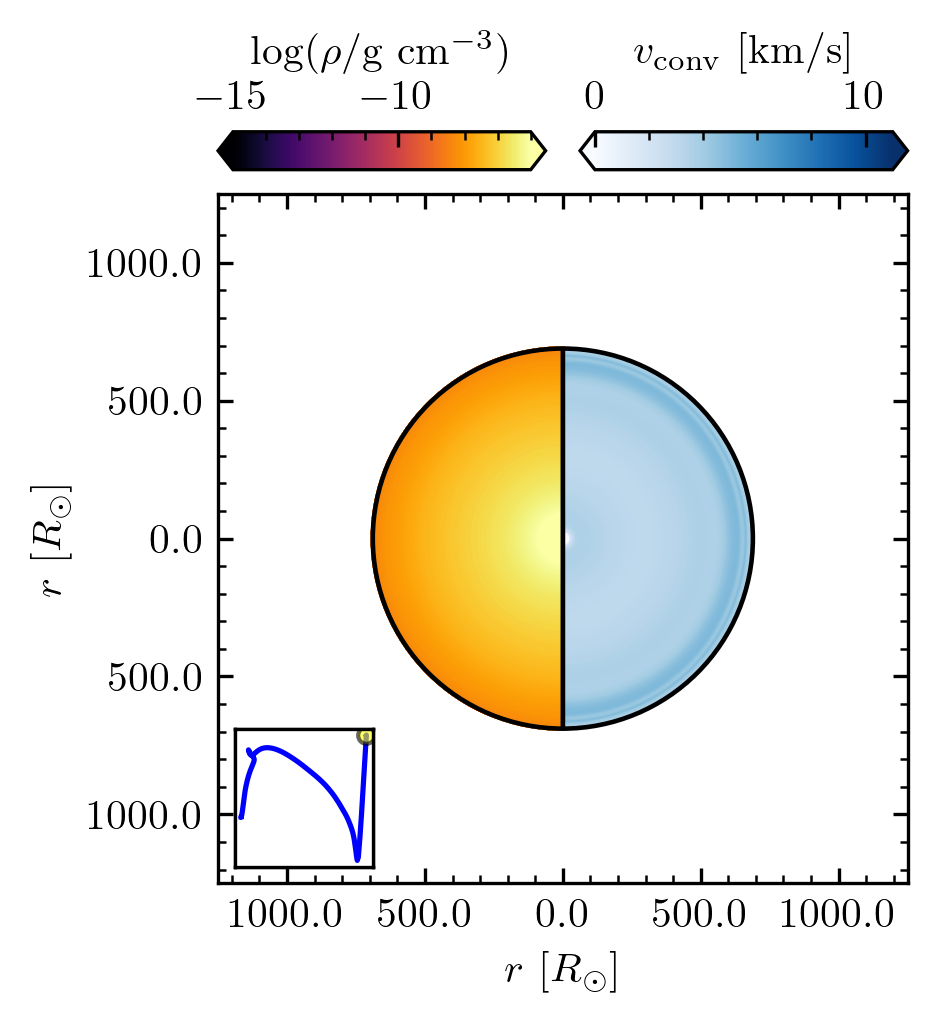

In [54]:

ind_core_he_depl = -1 # index of core He depletion is -1 becuase we terminate at core He depletion 

# set up figure 
fig = plt.figure(figsize=(3.38, 3.38))
ax = plt.gca()

# Set limits on r/Rsun, logrho cgs, v in km/s
axis_lim = 1250
rhomin = -15
rhomax = -6
velmin = 0
velmax = 11

rhomap = mpl.cm.inferno
velmap = mpl.cm.Blues

# Create the TULIPS objects
cb1 = tulips.property_profile(m11, property_name="conv_vel", fig=fig, ax=ax, cmin=velmin*1e5, cmax=velmax*1e5, theta1=270, theta2=90,
                        show_colorbar=False,  cmap=velmap, num_rings=500, time_ind=ind_core_he_depl, 
                        axis_label = r'$r$ [$R_\odot$]',  raxis='radius',
                        show_time_label=False, show_total_mass=False, axis_lim=axis_lim)

cb2 = tulips.property_profile(m11, property_name="logRho", fig=fig, ax=ax, cmin=rhomin, cmax=rhomax, theta1=90, theta2=270,
                        show_colorbar=False, cmap=rhomap, num_rings=500, time_ind=ind_core_he_depl, 
                        axis_label = r'$r$ [$R_\odot$]',  raxis='radius',                        
                        show_time_label=False, show_total_mass=False, axis_lim=axis_lim)


# Set up colorbars using a proxy with the same parameters for rho (left/first) and v (right/second)
sm = plt.cm.ScalarMappable(cmap=rhomap, norm=Normalize(vmin=rhomin, vmax=rhomax))
axins1 = inset_axes(ax,
               width="50%",  # width = 5% of parent_bbox width
               height="5%",  # height : 50%
               loc='upper left',
               bbox_to_anchor=(0, -0.01, 0.95, 1.1),
               bbox_transform=ax.transAxes,
               borderpad=0,
               )
cbar1 = plt.colorbar(sm, cax=axins1, extend = 'both', orientation='horizontal')
cbar1.set_label(r"$\log(\rho/{\rm g\ cm^{-3}})$")

sm2 = plt.cm.ScalarMappable(cmap=mpl.cm.Blues, norm=Normalize(vmin=velmin, vmax=velmax))
axins2 = inset_axes(ax,
               width="50%",  # width = 5% of parent_bbox width
               height="5%",  # height : 50%
               loc='upper right',
               bbox_to_anchor=(0.05, -0.01, 0.95, 1.1),
               bbox_transform=ax.transAxes,
               borderpad=0,
               )
cbar2 = plt.colorbar(sm2, cax=axins2, extend = 'both', orientation='horizontal')
cbar2.set_label(r"$v_{\rm conv}$ [km/s]")

for cb in [cbar1,cbar2]:
    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')



ax.set(aspect="equal")
ax.set(frame_on=True)
ax.set_xlim(-1*axis_lim, axis_lim)
ax.set_ylim(-1*axis_lim, axis_lim)
plt.subplots_adjust(top=0.99, left=0.15, right=0.83, bottom=0.02)
fig.savefig("RSG_1D_slice.png", dpi=300)

LOGS_mlt2mesh2time2
LOGS_mlt2mesh1time1
LOGS_mlt2mesh0.75time0.75
LOGS_mlt2mesh0.5time0.5
LOGS_mlt2mesh0.3time0.3
LOGS_mlt2mesh0.2time0.2
LOGS_mlt2mesh0.1time0.1


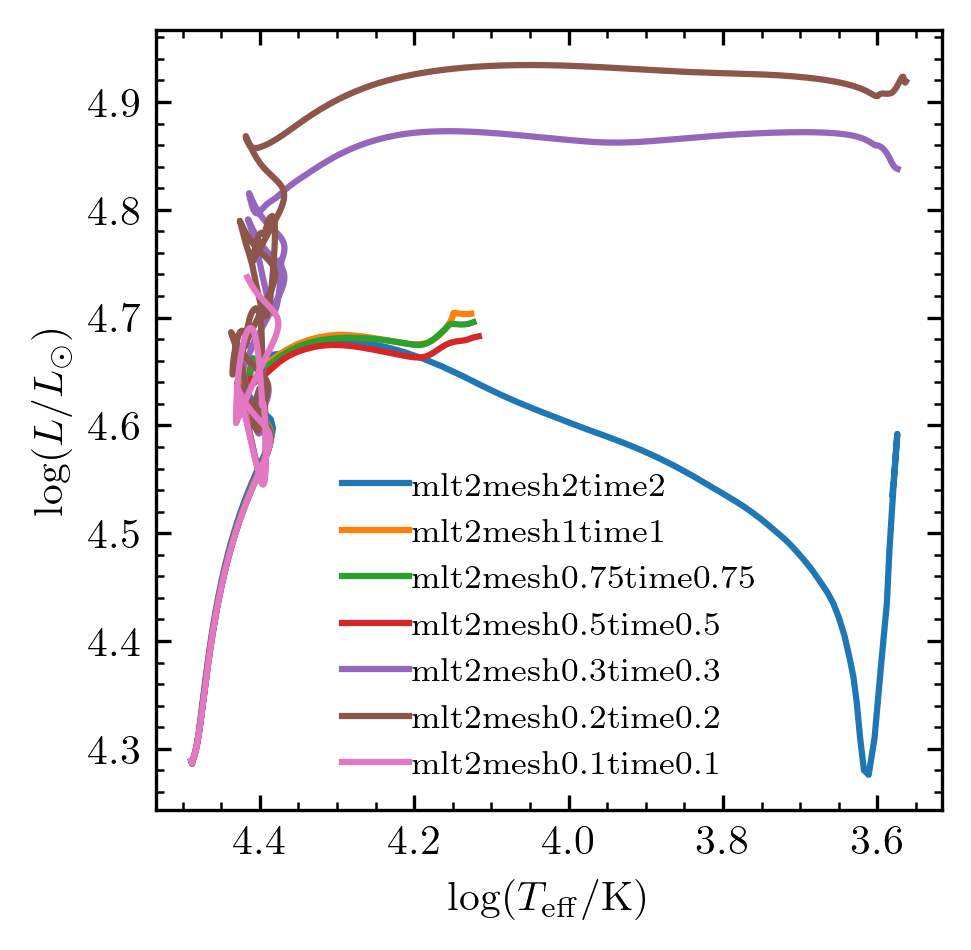

In [61]:
# Plot HR Diagram for mini-minilab 1

OUTDIR='./work_minimini1/RESOLUTION_TEST_LOGS/'

fig, ax = plt.subplots(figsize=(3.38,3.38))
for logdir in sorted(os.listdir(OUTDIR))[::-1]:
    print(logdir)    
    hdata = mr.MesaData(OUTDIR+logdir+'/history.data')
    ax.plot(hdata.log_Teff, hdata.log_L, label=logdir[5:])
    
plt.legend(loc='lower center')

ax.set_xlabel(r'log($T_{\rm eff}$/K)')
ax.set_ylabel(r'log($L/L_\odot$)')
ax.invert_xaxis()
plt.show()

LOGS_mlt2mesh2time2
LOGS_mlt2mesh1time1
LOGS_mlt2mesh0.75time0.75
LOGS_mlt2mesh0.5time0.5


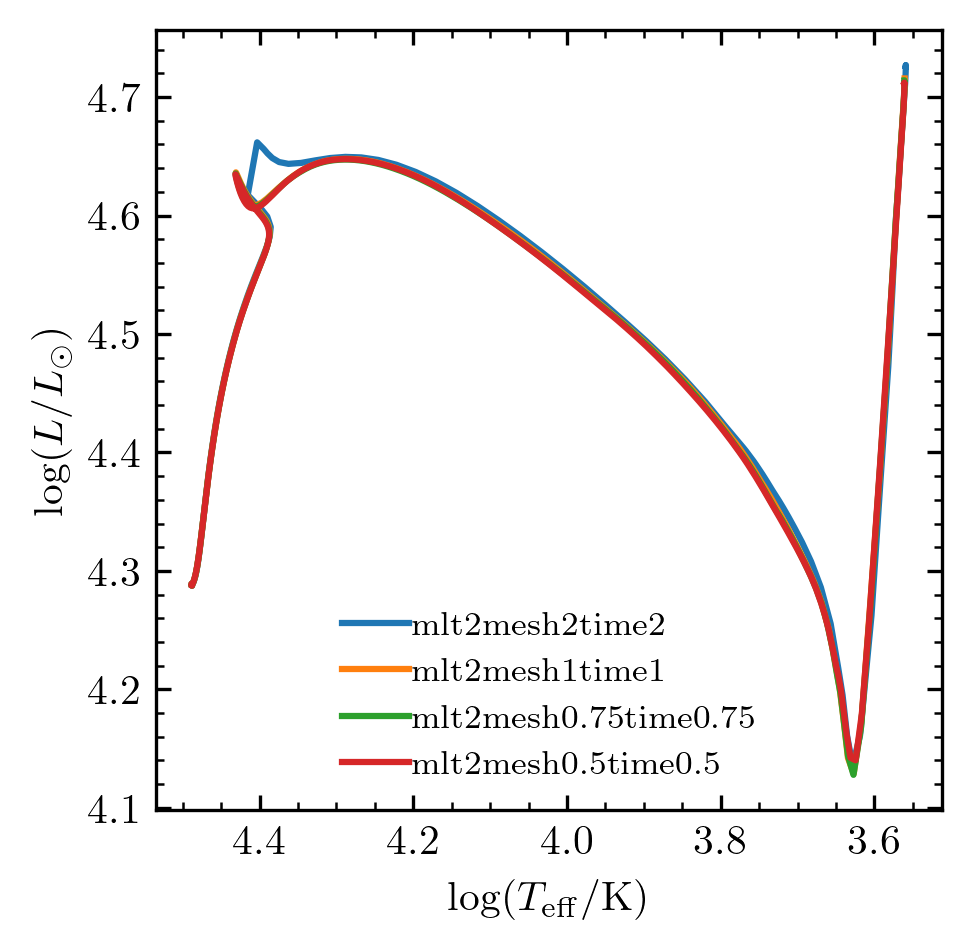

In [56]:
# Plot HR Diagram for mini-minilab 2

OUTDIR='./work_minimini2/SUCCESSFUL_TEST_LOGS/'
fig, ax = plt.subplots(figsize=(3.38,3.38))
for logdir in sorted(os.listdir(OUTDIR))[::-1]:
    print(logdir)    
    hdata = mr.MesaData(OUTDIR+logdir+'/history.data')
    ax.plot(hdata.log_Teff, hdata.log_L, label=logdir[5:])
    
plt.legend(loc='lower center')

ax.set_xlabel(r'log($T_{\rm eff}$/K)')
ax.set_ylabel(r'log($L/L_\odot$)')
ax.invert_xaxis()
plt.show()

LOGS_mlt3mesh1time1
LOGS_mlt2mesh1time1
LOGS_mlt1.8mesh1time1
LOGS_mlt1.5mesh1time1


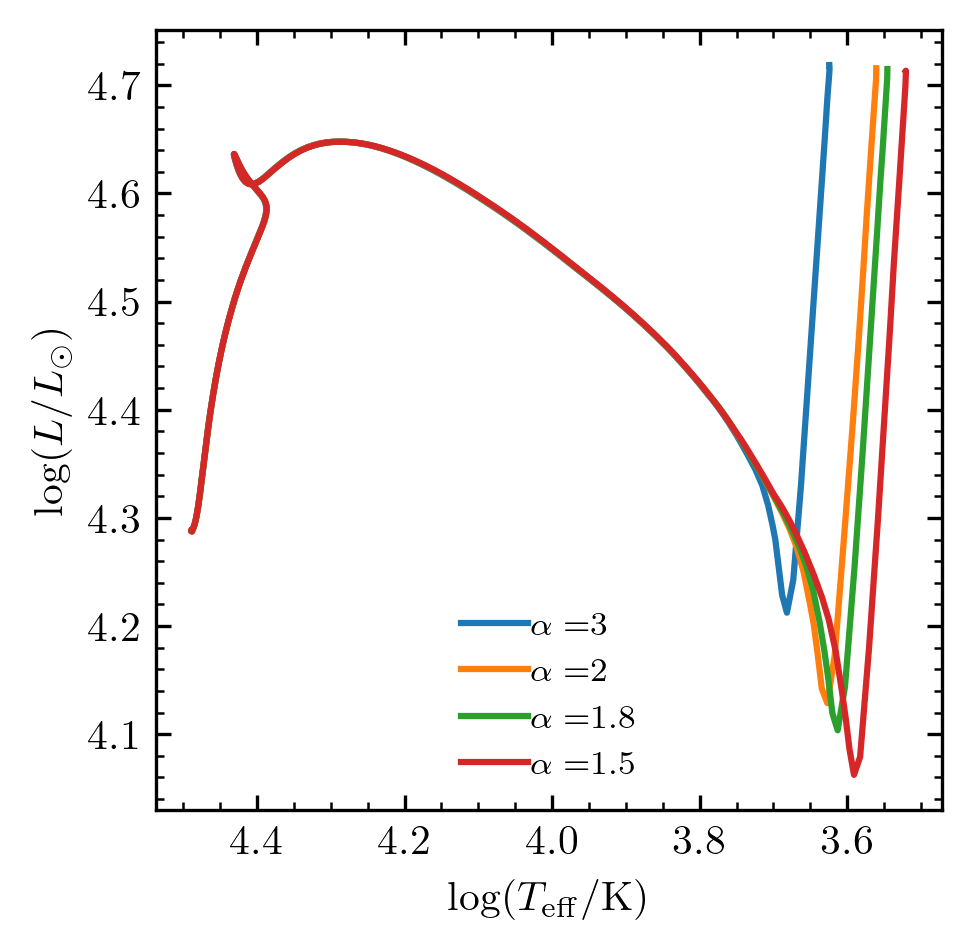

In [57]:
# Plot HR Diagram for mini-minilab 3

OUTDIR='./work_minimini3/ALPHA_TEST_LOGS/'
fig, ax = plt.subplots(figsize=(3.38,3.38))
for logdir in sorted(os.listdir(OUTDIR))[::-1]:
    print(logdir)    
    hdata = mr.MesaData(OUTDIR+logdir+'/history.data')
    ax.plot(hdata.log_Teff, hdata.log_L, label=r'$\alpha=$'+logdir[8:-10])
    
plt.legend(loc='lower center')

ax.set_xlabel(r'log($T_{\rm eff}$/K)')
ax.set_ylabel(r'log($L/L_\odot$)')
ax.invert_xaxis()
plt.show()

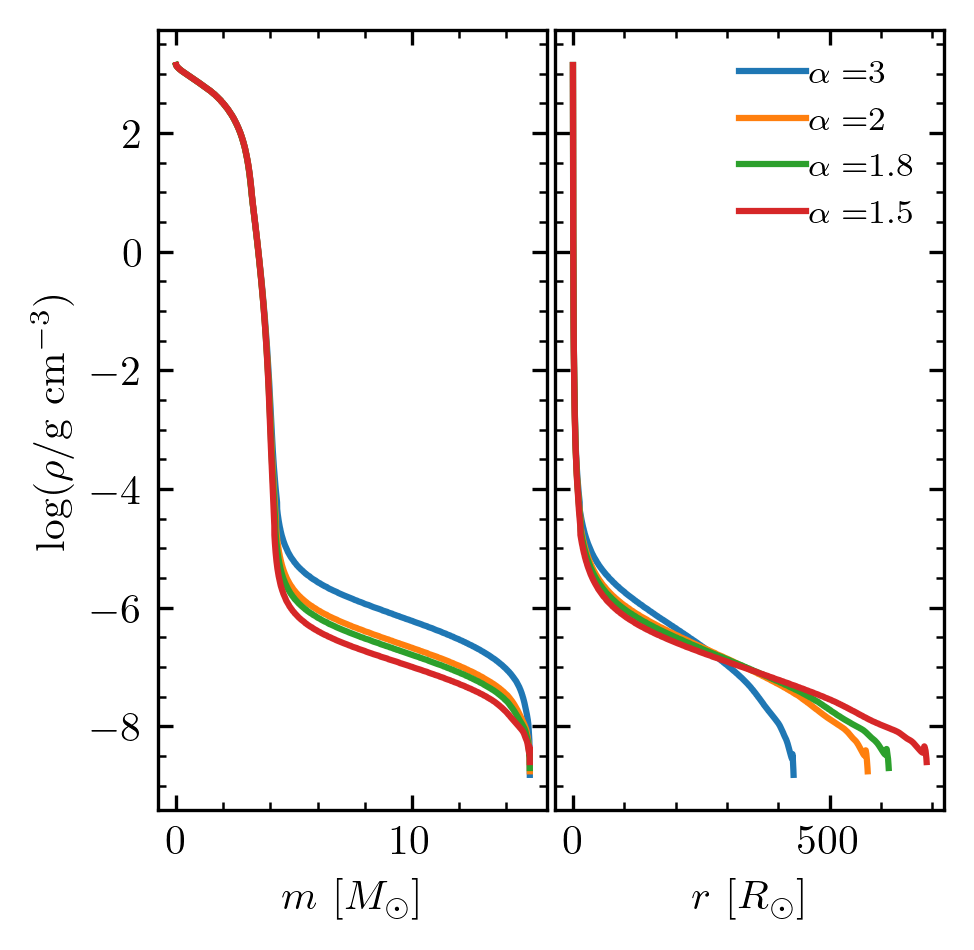

In [58]:
# Plot density profiles in m and r for Mini-minilab 3 

OUTDIR='./work_minimini3/ALPHA_TEST_LOGS/'
fig, axs = plt.subplots(1,2, figsize=(3.38,3.38), sharey=True)

for logdir in sorted(os.listdir(OUTDIR))[::-1]:
    pdata = mr.MesaData(OUTDIR+logdir+'/profile8.data')
    axs[0].plot(pdata.mass, pdata.logRho, label=r'$\alpha=$'+logdir[8:-10])    
    axs[1].plot(pdata.radius, pdata.logRho, label=r'$\alpha=$'+logdir[8:-10])
    
plt.legend(loc='upper right')

axs[0].set_xlabel(r'$m\ [M_\odot]$')
axs[1].set_xlabel(r'$r\ [R_\odot]$')
axs[0].set_ylabel(r'log($\rho/{\rm g\ cm^{-3}}$)')
fig.subplots_adjust(wspace = 0.02)
# ax.invert_xaxis()
plt.show()